# normally we want model with earlystopping, tensorboard, checkpoints
1. training set labbeled with classes
2. test set labbeld with classes
3. no of training examples
4. no of testing examples
5. height and width for each data
6. size of each image or video or skeleton
7. flatten the input
8. Standardize/Normalize the data
9. initialize model parameters
10. learn parameters for the model by minimizing the cost
11. use the learned parameters to make predictions (on test set)
12. Analyse results and conclude

## Steps dor building a neural Network

1. Define the model structure ( no of input features )
2. Initialize the model parameters
3. Loop:  
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    
You often build 1-3 separately and integrate them into one function we call `model()`.

* with some no of iterations
* You get train accuracy 
* You get test accuracy 
* plot learning rate through cost values and no of iterations

In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import datetime

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

print(tf.__version__)

2.3.0


In [3]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [4]:
#set callbacks, custom learning rate scheduler
# early stopping
earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=1)


# tensorboards
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, 
    histogram_freq=1
)

In [5]:
# load dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
def build_model(opt,l,metric):
    
    model =  keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(optimizer=opt,
              loss=l,
              metrics=[metric])
    print(model.summary())
    return model   

In [8]:
model = build_model('adam','sparse_categorical_crossentropy','accuracy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(x=x_train, 
          y=y_train, 
          epochs=10, 
          validation_data=(x_test, y_test),
          validation_freq=1,
          verbose=2,
          validation_split = 0.2,
          callbacks=[tensorboard_callback,tfdocs.modeling.EpochDots()])

Epoch 1/10
Instructions for updating:
use `tf.profiler.experimental.stop` instead.

Epoch: 0, accuracy:0.9282,  loss:0.2420,  val_accuracy:0.9629,  val_loss:0.1198,  
.1500/1500 - 3s - loss: 0.2420 - accuracy: 0.9282 - val_loss: 0.1198 - val_accuracy: 0.9629
Epoch 2/10
.1500/1500 - 2s - loss: 0.1068 - accuracy: 0.9669 - val_loss: 0.0894 - val_accuracy: 0.9729
Epoch 3/10
.1500/1500 - 2s - loss: 0.0733 - accuracy: 0.9765 - val_loss: 0.0802 - val_accuracy: 0.9758
Epoch 4/10
.1500/1500 - 2s - loss: 0.0562 - accuracy: 0.9821 - val_loss: 0.0791 - val_accuracy: 0.9768
Epoch 5/10
.1500/1500 - 2s - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0739 - val_accuracy: 0.9784
Epoch 6/10
.1500/1500 - 2s - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.0799 - val_accuracy: 0.9783
Epoch 7/10
.1500/1500 - 2s - loss: 0.0308 - accuracy: 0.9892 - val_loss: 0.0811 - val_accuracy: 0.9781
Epoch 8/10
.1500/1500 - 2s - loss: 0.0258 - accuracy: 0.9910 - val_loss: 0.0816 - val_accuracy: 0.9793
Epoch 9/10
.1500/150

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.037552,0.987646,0.079863,0.978250,5
6,0.030785,0.989187,0.081063,0.978083,6
7,0.025847,0.991042,0.081646,0.979250,7
8,0.025977,0.991083,0.090111,0.978500,8
9,0.020944,0.992896,0.088053,0.981333,9


<Figure size 432x288 with 0 Axes>

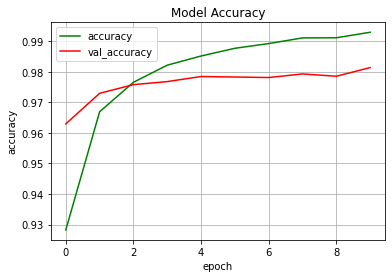

In [11]:
# Visualization
import matplotlib.pyplot as plt

plt.figure()
fig, ax = plt.subplots()

plt.title('Model Accuracy')

ax.plot(hist['epoch'],hist['accuracy'],'g-',label='accuracy')
plt.xlabel('epoch')
plt.legend('train')
ax.plot(hist['epoch'],hist['val_accuracy'],'r-',label='val_accuracy')
plt.ylabel('accuracy')
plt.legend('test')
plt.xlabel('epoch')
leg = ax.legend();
plt.grid(True)
plt.show()

In [12]:
score = model.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 0s 906us/step - loss: 0.0694 - accuracy: 0.9832


In [13]:
pred = model.predict(x_test)

In [14]:
pred.shape,y_test.shape

((10000, 10), (10000,))

In [19]:
p = []
label = []
for i in range(25):
    p.append(np.argmax(pred[i]))
    label.append(y_test[i])

print(p) 
print(label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4]


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(p,label)

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])